<a href="https://colab.research.google.com/github/vatsmanish/Handwritten_ocr_experiment/blob/master/OCR_ALEXNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import pickle
import csv
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from PIL import Image

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import densenet
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import densenet
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
from keras import backend as K
from PIL import Image

# Import Keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# New Section

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# path =( '/content/gdrive/My Drive/colab_notebooks/result/results')
# '/content/gdrive/My Drive/colab_notebooks/result/results'
path = '/content/gdrive/My Drive/colab_notebooks/result/results'

In [0]:
# uplaod local file on colab
from google.colab import files
uploaded = files.upload()

Saving train_converted.csv to train_converted.csv


In [0]:
# inport path of file and pass the data set
import io
df = pd.read_csv(io.BytesIO(uploaded['train_converted.csv']))

In [0]:
len(df)

10540

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [0]:
df.shape

(10540, 785)

In [0]:
df.iloc[0,0]

0

In [0]:
# x=np.array(df.iloc[:, 1:]).reshape(df.shape[0],1,28, 28).astype('float32')
# len(x)

10540

In [0]:
from sklearn.utils import shuffle
path=pd.DataFrame(shuffle(path.values))
df2

AttributeError: ignored

In [0]:
(train_images, train_labels) = (np.array(df2.iloc[:, 1:]).reshape(path.shape[0],28,28,1).astype('float32'),path.iloc[:,0])
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0

AttributeError: ignored

In [0]:
(train_images, train_labels) , (test_images, test_labels) = (train_images[:8000], train_labels[:8000]),(train_images[8000:], train_labels[8000:])

In [0]:
test_labels

8000     26
8001     12
8002     24
8003     15
8004     49
         ..
10535    18
10536    37
10537    13
10538    27
10539    43
Name: label, Length: 2540, dtype: int64

In [0]:
train_images.head()

AttributeError: ignored

AttributeError: ignored

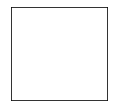

In [0]:
class_names = ['0']

plt.figure(figsize=(10,10))
for i in range(25):
     plt.subplot(5,5,i+1)
     plt.xticks([])
     plt.yticks([])
     plt.grid(False)
     plt.imshow(np.array(train_images.loc[i,:]).reshape(28,28), cmap=plt.cm.binary)
     # The CIFAR labels happen to be arrays, 
     # which is why you need the extra index
     plt.xlabel(train_labels[i])
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# how to calculate parameter

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 53,400
Trainable params: 53,400
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(50))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 8000 samples, validate on 2540 samples
Epoch 1/10
8000/8000 [==============================] - 7s 898us/sample - loss: 3.7911 - acc: 0.1177 - val_loss: 3.7611 - val_acc: 0.1205
Epoch 2/10
8000/8000 [==============================] - 1s 112us/sample - loss: 3.7658 - acc: 0.1211 - val_loss: 3.7607 - val_acc: 0.1205
Epoch 3/10
8000/8000 [==============================] - 1s 112us/sample - loss: 3.7620 - acc: 0.1211 - val_loss: 3.7620 - val_acc: 0.1205
Epoch 4/10
8000/8000 [==============================] - 1s 112us/sample - loss: 3.7604 - acc: 0.1211 - val_loss: 3.7640 - val_acc: 0.1205
Epoch 5/10
8000/8000 [==============================] - 1s 115us/sample - loss: 3.7579 - acc: 0.1211 - val_loss: 3.7619 - val_acc: 0.1205
Epoch 6/10
8000/8000 [==============================] - 1s 117us/sample - loss: 3.7545 - acc: 0.1211 - val_loss: 3.7729 - val_acc: 0.1205
Epoch 7/10
8000/8000 [==============================] - 1s 111us/sample - loss: 3.7521 - acc: 0.1211 - val_loss: 3.7645 - va

In [0]:
train_data_dir = df
validation_data_dir = df
img_width, img_height = 28, 28
nb_train_samples = 4271
nb_validation_samples = 4271
epochs = 10
batch_size = 128
n_classes = 11

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    #fill_mode = 'constant',
    #cval = 1,
    rotation_range = 10,
    width_shift_range=0.2,
    height_shift_range=0.2)
    #horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

TypeError: ignored

In [0]:
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [0]:
K.set_learning_phase(1)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)

In [0]:
model = Sequential()

In [0]:
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(28,28,1), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))


ValueError: ignored

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)        

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

ValueError: ignored

In [0]:
# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam',\
 metrics=['accuracy'])

# (5) Train
model.fit(df, batch_size=64, epochs=10, verbose=1, \
validation_split=0.2, shuffle=True)

ValueError: ignored

In [0]:
early_stop = EarlyStopping(monitor='val_loss', patience=1, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)
history1 = model.fit_generator(x, epochs=10,)

ValueError: ignored